# Lab 2 : Linear Classification, Logistic Regression, SVM, PCA, Decision Tree

---


Total Points: **90**

Tentative Weightage : **9%**

Submission Deadline :  **$20^{th}$ March 2023 , 10:00 AM** (4 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**: Classification                                     **(27 Marks)**

Indian Institute of Technology Ropar is planning to start machine learning based shortlisting criteria for Ph.D admissions. To analyze this problem let us start with a small user friendly dataset given in filename - 'classification_data1.txt'. The dataset contains performance in two entrance exams namely GATE and UGC-NET. With respect to this dataset, implement/report following:

1. Plot the dataset using different colors for the two classes. (2 Marks)

2. Implement the least square method for classification and plot the decision boundary. Clearly describe your results/observations in report. Is the decision boundary able to classify the points correctly? (4+3+3 Marks)

3. Usually, machine learning models, while training involves certain randomness. One example is splitting our data set into train and test sets. 
Each of you might generate entirely different train and test instances. We usually fix the seed value before executing our code to handle such issues. These seed values are used in generating random numbers. We run our code over different seed values to avoid uncertainities over selecting different train and test instances. The overall accuracy (or loss) results are reported as mean and standard deviation over these independent runs. Let's learn this idea via the following:

 3a) Implement a logistic regressor using the gradient descent method. 
Train the model on $80\%$ of a randomly divided dataset with a fixed learning rate $\beta$. Report the find the training and testing accuracy over $10$ independent runs. (5 Marks)

 3b) Repeat the previous experiment with different learning rates $\beta$ (of your choice) and plot the training, testing accuracies over $10$ independent runs for each $\beta$ value. (3 + 3 Marks)

 3c) Plot the classifier and decision boundary for the best regressor. Does the performance improve in comparison to least square method? (4 Marks)


**NOTE:** You can take seed values to be 0,100,200,300,$\ldots$,1000. (You can take any other values as well. Fix seedvalue from both numpy and random package).

Write your code by creating cells below.


In [ ]:
import pandas as pd
import random
from random import sample
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import numpy as np

TASK 1

---



QUESTION 1

In [ ]:
col_names = ["GATE","UGC-NET","Shortlisted"]
df = pd.read_csv('/content/PRINCY MALHOTRA - classification_data1.txt',sep=',',names= col_names, index_col=False)
df

,GATE,UGC-NET,Shortlisted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


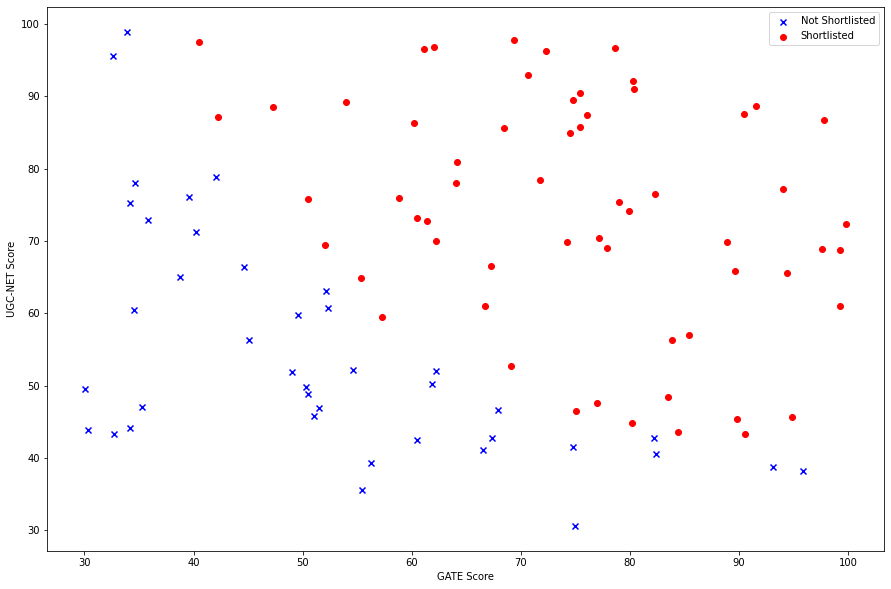

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

figure(figsize = (15,10))

# Load the dataset
data = np.loadtxt('/content/PRINCY MALHOTRA - classification_data1.txt', delimiter=',')
X = data[:, :-1]  # Features
y = data[:, -1]   # Labels

# Plot the dataset
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker = 'x', label='Not Shortlisted')
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker = 'o', label='Shortlisted')
plt.xlabel('GATE Score')
plt.ylabel('UGC-NET Score')
plt.legend()
plt.show()

Question 2

[ 0.01484087  0.01394217 -1.29749694]


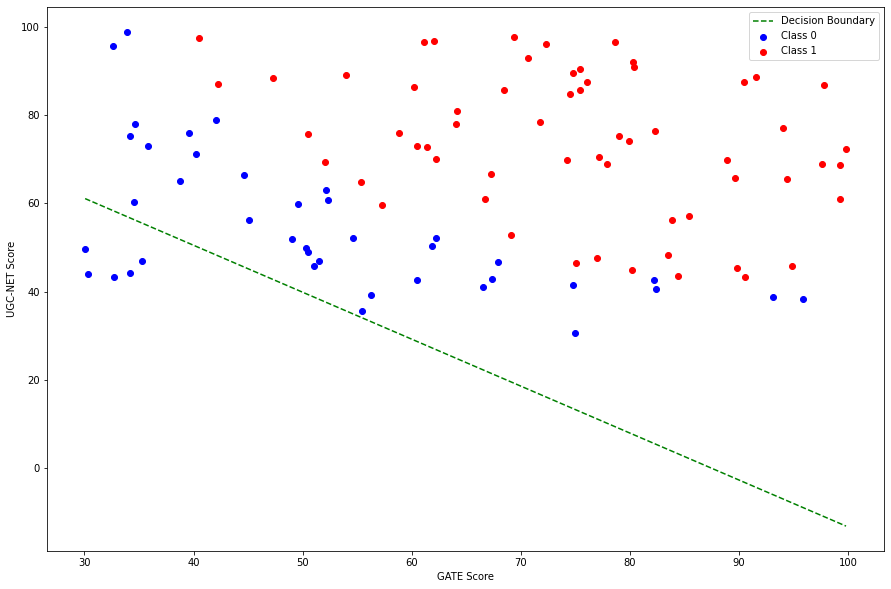

In [ ]:
figure(figsize = (15,10))

# Add a bias term to the features
X2 = np.hstack([X, np.ones((X.shape[0], 1))])

# Calculate the weights using the least square method
w = np.linalg.inv(X2.T @ X2) @ X2.T @ y
print(w)

# Plot the decision boundary
x1 = np.linspace(np.min(X2[:, 0]), np.max(X2[:, 0]), 100)
x2 = (-(w[0]*x1 + w[2]))/w[1]
plt.plot(x1, x2, 'g--', label='Decision Boundary')

# Plot the dataset
plt.scatter(X2[y==0, 0], X2[y==0, 1], c='b', label='Class 0')
plt.scatter(X2[y==1, 0], X2[y==1, 1], c='r', label='Class 1')
plt.xlabel('GATE Score')
plt.ylabel('UGC-NET Score')
plt.legend()
plt.show()

Question 3a

In [ ]:
#Took 6 min 41 sec for 50000 iterations and 0.01 learning rate and gamma = 0.9 (using Nesterov Gradient Descent)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/PRINCY MALHOTRA - classification_data1.txt', sep=',', header=None, names=['gate', 'ugc_net', 'label'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['gate', 'ugc_net']], data['label'], test_size=0.2, random_state=42)

# Define the logistic regression model using the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_iterations, learning_rate, gamma):
    
    #print(X.shape[0], " ", X.shape[1])
    w = np.zeros(X.shape[1])
    b = 0
    v_w = np.zeros(X.shape[1])
    v_b = 0
    
    # Gradient descent
    for i in range(num_iterations):

        v_w_prev = v_w.copy()
        v_b_prev = v_b
        v_w = gamma * v_w_prev + learning_rate * np.dot(X.T, sigmoid(np.dot(X, w - gamma * v_w_prev) + b - gamma * v_b_prev) - y) / X.shape[0]
        v_b = gamma * v_b_prev + learning_rate * np.sum(sigmoid(np.dot(X, w - gamma * v_w_prev) + b - gamma * v_b_prev) - y) / X.shape[0]
        
        # Update the parameters
        w = w - v_w
        b = b - v_b
    
    return w, b

# Train the logistic regression model and calculate the training and testing accuracy over 10 independent runs
num_iterations = 50000
learning_rate = 0.01
gamma = 0.9
train_acc = []
test_acc = []

for s in range(10):
    # Split the dataset with a new random seed
    X_train, X_test, y_train, y_test = train_test_split(data[['gate', 'ugc_net']], data['label'], test_size=0.2, random_state=s)
    
    # Train the logistic regression model
    w, b = logistic_regression(X_train, y_train, num_iterations, learning_rate, gamma)
    
    # Predict the labels for the training and testing sets
    y_train_pred = sigmoid(np.dot(X_train, w) + b)
    y_train_pred = np.round(y_train_pred)
    y_test_pred = sigmoid(np.dot(X_test, w) + b)
    y_test_pred = np.round(y_test_pred)
    
    # Calculate the training and testing accuracy
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Print the training and testing accuracy over 10 independent runs
print('Training accuracy over 10 independent runs:', train_acc)
print('Mean training accuracy:', np.mean(train_acc))
print('Standard deviation of training accuracy:', np.std(train_acc))
print('Testing accuracy over 10 independent runs:', test_acc)
print('Mean testing accuracy:', np.mean(test_acc))
print('Standard deviation of testing accuracy:', np.std(test_acc))

Training accuracy over 10 independent runs: [0.9125, 0.9125, 0.9375, 0.9125, 0.9, 0.925, 0.925, 0.8625, 0.925, 0.875]
Mean training accuracy: 0.9087500000000001
Standard deviation of training accuracy: 0.022395591083961146
Testing accuracy over 10 independent runs: [0.85, 0.85, 0.85, 0.9, 0.8, 0.9, 0.9, 1.0, 0.9, 0.9]
Mean testing accuracy: 0.8850000000000001
Standard deviation of testing accuracy: 0.05024937810560445


Question 3b

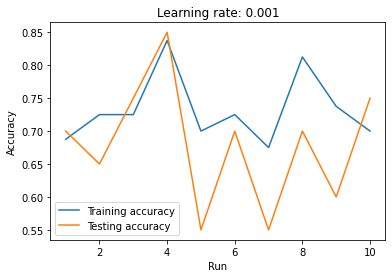

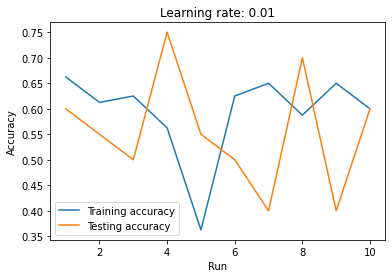

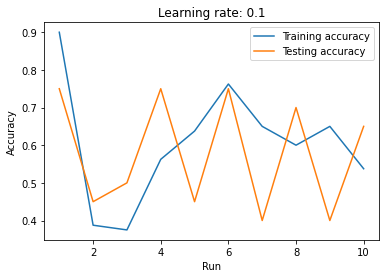

<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-33-bf834198951b>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

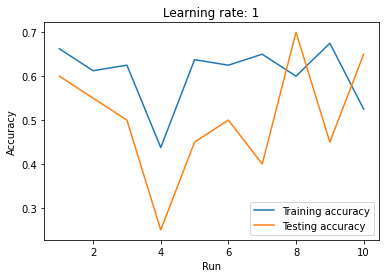

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/PRINCY MALHOTRA - classification_data1.txt', header=None, names=['gate', 'ugc_net', 'label'])

# Define the logistic regression model using the sigmoid function
def sigmoid(z):
    #  if z<0:
    #      return np.exp(z)/(1+np.exp(z))
    #  else:
        return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_iterations, learning_rate, gamma):
    # Initialize the parameters
    w = np.zeros(X.shape[1])
    b = 0
    v_w = np.zeros(X.shape[1])
    v_b = 0
    
    # Nesterov gradient descent
    for i in range(num_iterations):
    
        
        v_w_prev = v_w.copy()
        v_b_prev = v_b
        v_w = gamma * v_w_prev + learning_rate * np.dot(X.T, sigmoid(np.dot(X, w - gamma * v_w_prev) + b - gamma * v_b_prev) - y) / X.shape[0]
        v_b = gamma * v_b_prev + learning_rate * np.sum(sigmoid(np.dot(X, w - gamma * v_w_prev) + b - gamma * v_b_prev) - y) / X.shape[0]
        
        # Update the parameters
        w = w - v_w
        b = b - v_b
    
    
    #print(w, " ", b)
    return w, b

# Train the logistic regression model for different learning rates and plot the training and testing accuracies over 10 independent runs
num_iterations = 10000
gamma = 0.5
learning_rates = [0.001, 0.01, 0.1, 1]
weights = {}
biases = {}
train_acc = np.zeros((len(learning_rates), 10))
test_acc = np.zeros((len(learning_rates), 10))

for i, learning_rate in enumerate(learning_rates):
    weights[i] = {}
    biases[i] = {}
    for seed in range(10):
        # Split the dataset with a new random seed
        X_train, X_test, y_train, y_test = train_test_split(data[['gate', 'ugc_net']], data['label'], test_size=0.2, random_state=seed)

        # Train the logistic regression model
        w, b = logistic_regression(X_train, y_train, num_iterations, learning_rate, gamma)

        # Predict the labels for the training and testing sets
        y_train_pred = sigmoid(np.dot(X_train, w) + b)
        y_train_pred = np.round(y_train_pred)
        y_test_pred = sigmoid(np.dot(X_test, w) + b)
        y_test_pred = np.round(y_test_pred)

        # Calculate the training and testing accuracy
        train_acc[i, seed] = accuracy_score(y_train, y_train_pred)
        test_acc[i, seed] = accuracy_score(y_test, y_test_pred)
        weights[i][seed] = w
        biases[i][seed] = b

    # Plot the training and testing accuracies over 10 independent runs for the current beta value
    plt.plot(np.arange(1, 11), train_acc[i, :], label='Training accuracy')
    plt.plot(np.arange(1, 11), test_acc[i, :], label='Testing accuracy')
    plt.title('Learning rate: ' + str(learning_rate))
    plt.xlabel('Run')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


Question 3c

Train Accuracy for Logistic Regression (with learning rate = 0.01) =  0.9125
Test Accuracy for Logistic Regression (with learning rate = 0.01) =  0.9
Train Accuracy for Least Squares =  0.625
Test Accuracy for Least Squares =  0.75


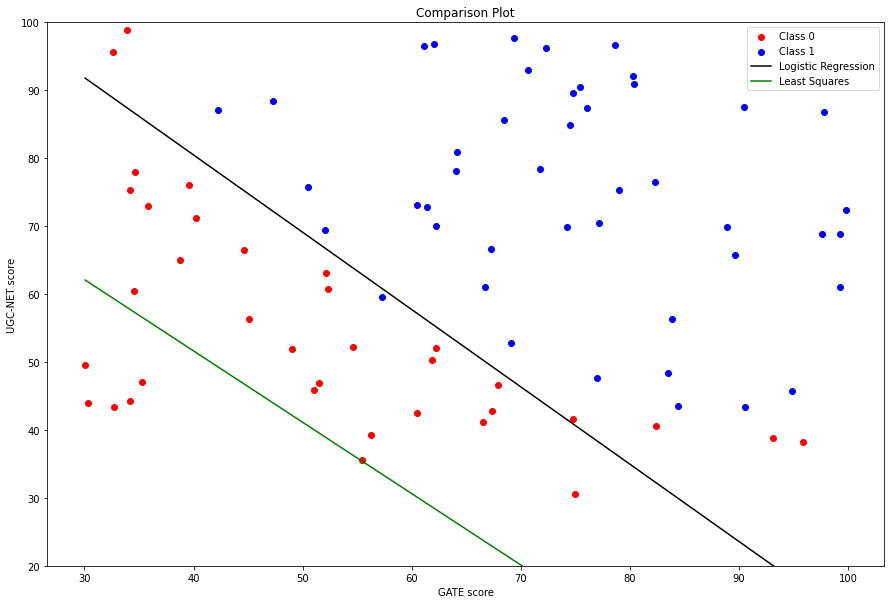

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('/content/PRINCY MALHOTRA - classification_data1.txt', delimiter=',')

figure(figsize = (15,10))

# Split the dataset into training and testing sets
np.random.shuffle(data)
train_data = data[:80, :]
test_data = data[80:, :]

# Define the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the Nesterov gradient descent method
def nesterov_grad_descent(X, y, lr, num_iters):
    # Initialize the weights
    w = np.zeros(X.shape[1])
    # Initialize the momentum
    v = np.zeros(X.shape[1])
    # Set the momentum parameter
    gamma = 0.9
    # Perform gradient descent
    for i in range(num_iters):
        # Compute the gradient using Nesterov momentum
        grad = np.dot(X.T, sigmoid(np.dot(X, w - gamma * v)) - y) / y.size
        # Update the momentum
        v = gamma * v + lr * grad
        # Update the weights
        w = w - v
    # Return the weights
    return w

# Define the predict function
def predict(X, w):
    y_pred = sigmoid(np.dot(X, w))
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    return y_pred

# Define the accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def predict_ls(X, w):
    y_pred = np.dot(X, w)
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    return y_pred

# Train the model with the best learning rate (0.1)
X_train = np.hstack((train_data[:, 0:2], np.ones((train_data.shape[0], 1))))
y_train = train_data[:, 2]
X_test = np.hstack((test_data[:, 0:2], np.ones((test_data.shape[0], 1))))
y_test = test_data[:, 2]

w = nesterov_grad_descent(X_train, y_train, lr=0.01, num_iters=10000)

# Plot the data points
plt.scatter(train_data[train_data[:, 2] == 0, 0], train_data[train_data[:, 2] == 0, 1], color='red', label='Class 0')
plt.scatter(train_data[train_data[:, 2] == 1, 0], train_data[train_data[:, 2] == 1, 1], color='blue', label='Class 1')

# Plot the decision boundary
x1 = np.linspace(np.min(train_data[:, 0]), np.max(train_data[:, 0]), 100)
x2 = (-(w[0]*x1 + w[2])) / w[1]
plt.plot(x1, x2, color='black', label='Logistic Regression')

y_train_pred = predict(X_train,w)
y_test_pred = predict(X_test,w)
train_acc1 = accuracy_score(y_train, y_train_pred)
test_acc1 = accuracy_score(y_test, y_test_pred)


w_ls = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
x2_ls = (-(w_ls[0]*x1 + w_ls[2]))/w_ls[1]
plt.plot(x1, x2_ls, color='green', label='Least Squares')

y_train_pred_ls = predict(X_train,w_ls)
y_test_pred_ls = predict(X_test,w_ls)
train_acc2 = accuracy_score(y_train, y_train_pred_ls)
test_acc2 = accuracy_score(y_test, y_test_pred_ls)

print("Train Accuracy for Logistic Regression (with learning rate = 0.01) = ", train_acc1)
print("Test Accuracy for Logistic Regression (with learning rate = 0.01) = ", test_acc1)
print("Train Accuracy for Least Squares = ", train_acc2)
print("Test Accuracy for Least Squares = ", test_acc2)


# Add axis labels and legend
plt.ylim(20,100)
plt.legend()
plt.xlabel('GATE score')
plt.ylabel('UGC-NET score')
plt.title('Comparison Plot')
plt.show()


**TASK 2**: Classification (Continued)                        **(14 Marks)**

Now lets change the dataset and load classification_data2.txt 

1. Plot the dataset with color coding as in previous task. (2 Marks)

2. Implement regularized (ridge regression) based logistic regressor using gradient descent. Additionally since the data is non-linear we will map the input to a $28$ dimensional vector given by $[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, \ldots, x_1 x_2^5, x_2^6]$. (6 Marks)

Now we can manage to prevent overfitting in high dimension using regularizaiton. So for different regularization parameter say $\lambda$ plot non linear decision boundaries. Can you identify cases of underfitting, or overfitting? Report the observations in separate report.  (4 + 2 Marks)

**NOTE**: To plot non-linear boundary you can try to find the output of classifier on evenly spaced grid and than draw the contor plot wherever output changes from say shortlisted to not shortlisted. 


Write your code by creating cells below.


TASK 2

---



Question 1

In [ ]:
col_names2 = ["GATE","UGC-NET","Shortlisted"]
df2 = pd.read_csv('/content/PRINCY MALHOTRA - classification_data2.txt',sep=',',names= col_names2, index_col=False)
df2

,GATE,UGC-NET,Shortlisted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


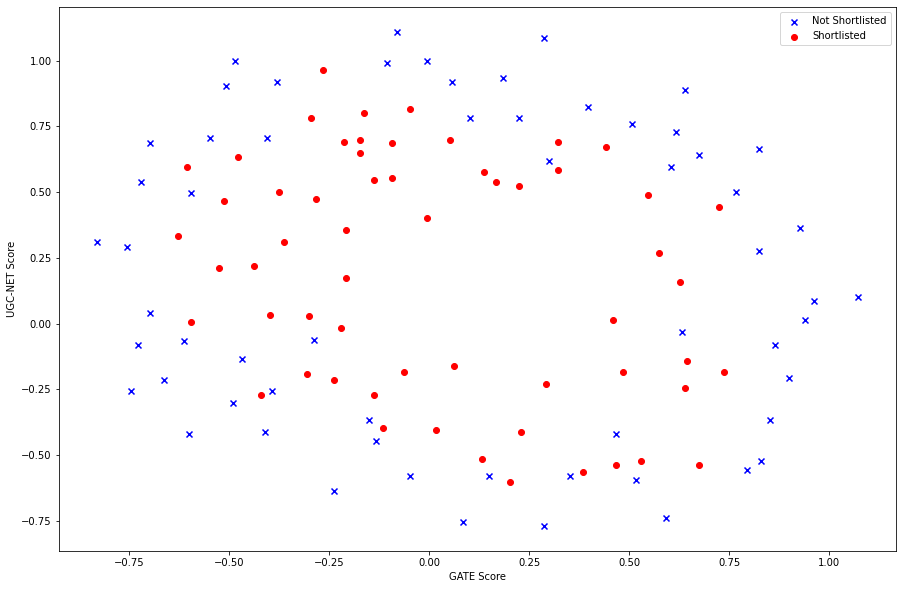

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

figure(figsize = (15,10))

# Load the dataset
data2 = np.loadtxt('/content/PRINCY MALHOTRA - classification_data2.txt', delimiter=',')
X = data2[:, :-1]  # Features
y = data2[:, -1]   # Labels

# Plot the dataset
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker = 'x', label='Not Shortlisted')
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker = 'o', label='Shortlisted')
plt.xlabel('GATE Score')
plt.ylabel('UGC-NET Score')
plt.legend()
plt.show()

Question 2

Train Accuracy =  0.8723404255319149
Test Accuracy =  0.7083333333333334


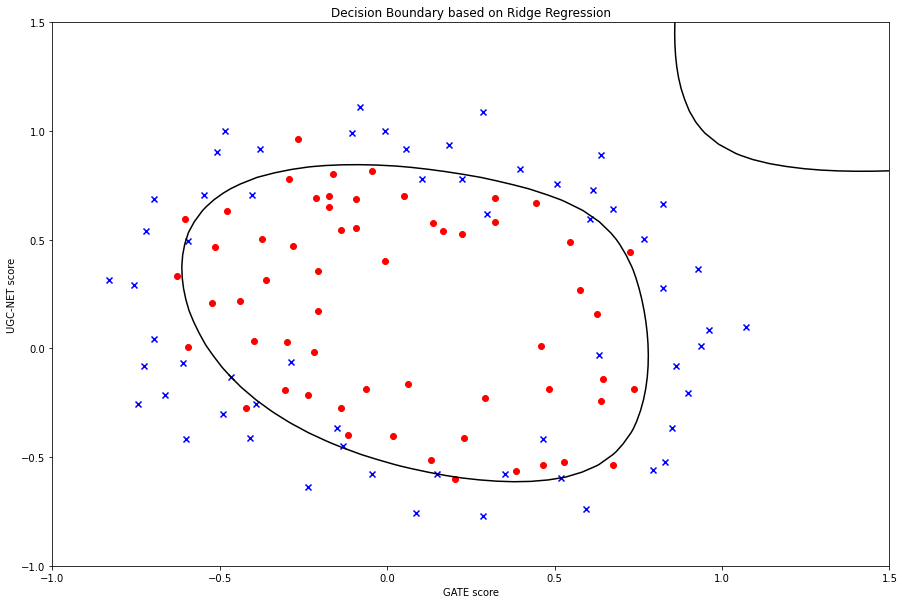

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
figure(figsize = (15,10))

def map_features(x1,x2):
  degree = 6
  out = np.ones(x1.shape)
  #print(out.shape)
  for i in range(1, degree+1):
    for j in range(i+1):
      out = np.vstack((out,(x1**(i-j))*(x2**j)))

  #print(out.shape) 
  #print(out)
  return out


def sigmoid(z):
  return 1/(1+np.exp(-z))

def cost_func(theta, X, y, lambda_):
  m = len(y)
  h = sigmoid(X@theta)
  J = (-1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h)) + (lambda_/(2*m))*np.sum(theta[1:]**2)
  return J

def gradient_function(theta, X, y, lambda_):
  m = len(y)
  h = sigmoid(X @ theta)
  grad = (1/m)*(X.T @ (h-y))
  grad[1:] = grad[1:] + (lambda_/m) * theta[1:]
  return grad

def logistic_regression(X, y, lambda_, alpha, num_iters):
  m,n = X.shape
  theta = np.zeros(n)
  J_history = []
  for i in range(num_iters):
    grad = gradient_function(theta, X, y, lambda_)
    theta = theta - alpha * grad
    J_history.append(cost_func(theta, X, y, lambda_))
  return theta, J_history

def normalise_data(X):
  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X = (X-mu)/sigma
  return X


data2 = np.loadtxt('/content/PRINCY MALHOTRA - classification_data2.txt', delimiter=',')
X = data2[:, 0:2]  # Features
#print(X)
y = data2[:, 2]   # Labels

plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker = 'x', label='Not Shortlisted')
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker = 'o', label='Shortlisted')

X = map_features(X[:,0],X[:,1])
#print(X)
X = normalise_data(X)
X = X.T
#print(X.shape)

#Split the data into training and testing sets
np.random.seed(42)
idx = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])
train_idx = idx[:train_size]
test_idx = idx[train_size:]
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]
#print(X_train.shape)

#Set hyperparameters
lambda_ = 0.5
alpha = 0.01
num_iters = 10000

theta, J_history = logistic_regression(X_train, y_train, lambda_, alpha, num_iters)
#print(theta.shape)

train_accuracy = np.mean(y_train == (sigmoid(X_train @ theta) >= 0.5))
test_accuracy = np.mean(y_test == (sigmoid(X_test @ theta) >= 0.5))
print('Train Accuracy = ' , train_accuracy)
print('Test Accuracy = ', test_accuracy)



u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_features(np.array([u[i]]), np.array([v[j]])).T, theta)
z = np.transpose(z)
plt.contour(u, v, z, levels=[0], colors='black')
plt.title('Decision Boundary based on Ridge Regression')
plt.xlabel('GATE score')
plt.ylabel('UGC-NET score')
plt.show()


# plt.figure()
# plt.plot(range(num_iters), J_history)
# plt.xlabel('Number of iterations')
# plt.ylabel('Cost')
# plt.title('Graph of Ridge Regression')
# plt.show()



For lambda =  0.1
Train Accuracy =  0.8829787234042553
Test Accuracy =  0.7083333333333334


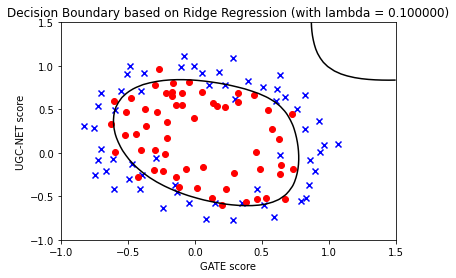



For lambda =  0.5
Train Accuracy =  0.8723404255319149
Test Accuracy =  0.7083333333333334


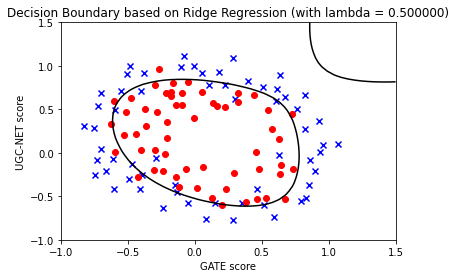



For lambda =  1
Train Accuracy =  0.8617021276595744
Test Accuracy =  0.6666666666666666


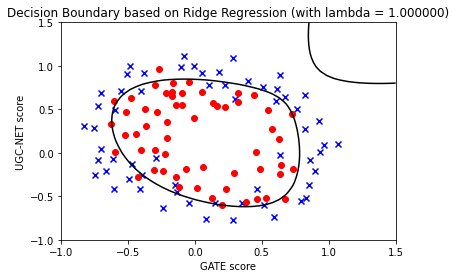



For lambda =  10
Train Accuracy =  0.8085106382978723
Test Accuracy =  0.7083333333333334


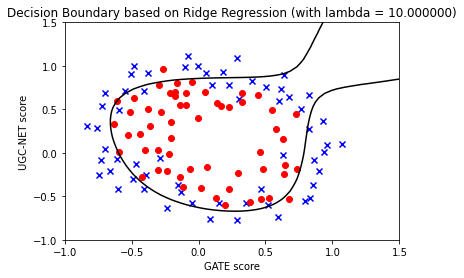



For lambda =  50
Train Accuracy =  0.723404255319149
Test Accuracy =  0.625


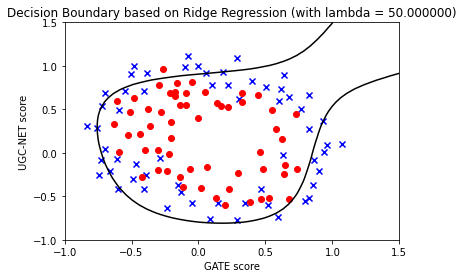



For lambda =  100
Train Accuracy =  0.6595744680851063
Test Accuracy =  0.4583333333333333


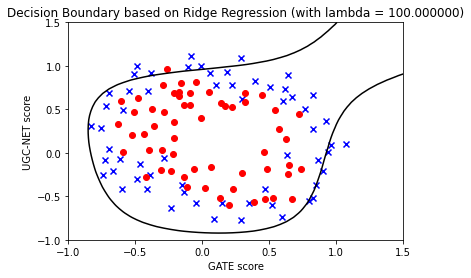

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#figure(figsize = (15,10))

def map_features(x1,x2):
  degree = 6
  out = np.ones(x1.shape)
  #print(out.shape)
  for i in range(1, degree+1):
    for j in range(i+1):
      out = np.vstack((out,(x1**(i-j))*(x2**j)))

  #print(out.shape) 
  #print(out)
  return out


def sigmoid(z):
  return 1/(1+np.exp(-z))

def cost_func(theta, X, y, lambda_):
  m = len(y)
  h = sigmoid(X@theta)
  J = (-1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h)) + (lambda_/(2*m))*np.sum(theta[1:]**2)
  return J

def gradient_function(theta, X, y, lambda_):
  m = len(y)
  h = sigmoid(X @ theta)
  grad = (1/m)*(X.T @ (h-y))
  grad[1:] = grad[1:] + (lambda_/m) * theta[1:]
  return grad

def logistic_regression(X, y, lambda_, alpha, num_iters):
  m,n = X.shape
  theta = np.zeros(n)
  J_history = []
  for i in range(num_iters):
    grad = gradient_function(theta, X, y, lambda_)
    theta = theta - alpha * grad
    J_history.append(cost_func(theta, X, y, lambda_))
  return theta, J_history

def normalise_data(X):
  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X = (X-mu)/sigma
  return X


data2 = np.loadtxt('/content/PRINCY MALHOTRA - classification_data2.txt', delimiter=',')
X = data2[:, 0:2]  # Features
#print(X)
y = data2[:, 2]   # Labels

# plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker = 'x', label='Not Shortlisted')
# plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker = 'o', label='Shortlisted')

X = map_features(X[:,0],X[:,1])
#print(X)
X = normalise_data(X)
X = X.T
#print(X.shape)

#Split the data into training and testing sets
np.random.seed(42)
idx = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])
train_idx = idx[:train_size]
test_idx = idx[train_size:]
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]
#print(X_train.shape)

#Set hyperparameters
lambdas_ = [0.1, 0.5, 1, 10, 50, 100]
alpha = 0.01
num_iters = 10000

for lambda_ in lambdas_:

  X2 = data2[:, 0:2]  # Features
#print(X)
  y2 = data2[:, 2]   # Labels

  plt.scatter(X2[y2==0, 0], X2[y2==0, 1], c='b', marker = 'x', label='Not Shortlisted')
  plt.scatter(X2[y2==1, 0], X2[y2==1, 1], c='r', marker = 'o', label='Shortlisted')
  theta, J_history = logistic_regression(X_train, y_train, lambda_, alpha, num_iters)
  #print(theta.shape)

  train_accuracy = np.mean(y_train == (sigmoid(X_train @ theta) >= 0.5))
  test_accuracy = np.mean(y_test == (sigmoid(X_test @ theta) >= 0.5))
  print('For lambda = ', lambda_)
  print('Train Accuracy = ' , train_accuracy)
  print('Test Accuracy = ', test_accuracy)



  u = np.linspace(-1, 1.5, 50)
  v = np.linspace(-1, 1.5, 50)
  z = np.zeros((len(u), len(v)))
  for i in range(len(u)):
      for j in range(len(v)):
          z[i,j] = np.dot(map_features(np.array([u[i]]), np.array([v[j]])).T, theta)
  z = np.transpose(z)
  plt.contour(u, v, z, levels=[0], colors='black')
  plt.title('Decision Boundary based on Ridge Regression (with lambda = %f)' % lambda_)
  plt.xlabel('GATE score')
  plt.ylabel('UGC-NET score')
  plt.show()
  print('\n')



**TASK 3**: SVM                         **(25 Marks)**

Now lets change the dataset and load SVM_data1.csv 

1. Load the dataset from file - SVM_data1.csv and Plot the dataset with color coding as in previous task. (2 Marks)

2. Implement a SVM classifier. Try to find the optimal penalty (or regularization) parameter $C$. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different $C$ values on X-axis. Report your observations. (2 + 2 + 2 + 3 + 2 + 2 Marks)

3. Load the dataset from file - SVM_data2.csv Try to fit a non linear SVM say polynomial kernel (degree=$2$) and RBF kernel.  Compare the results for both classifier. Does RBF leads to overfitting? Plot the decision boundary for optimal classifier in both kernels. (1+2+2+3+2+2 Marks)
 

Write your code by creating cells below.


**NOTE**: Sample decision boundary plot (can be of either type or any new creative solutions are also welcomed:
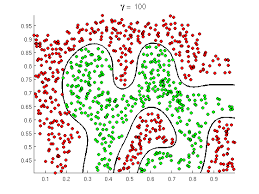
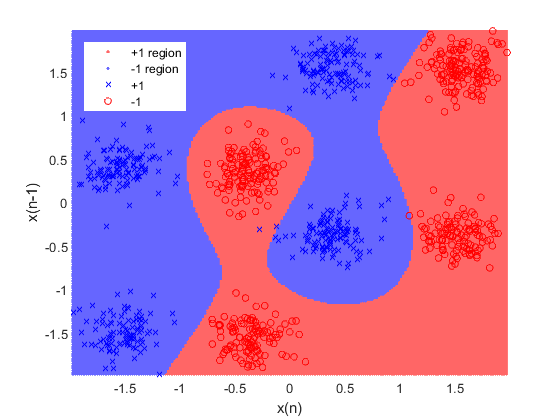


TASK 3

---



Question 1

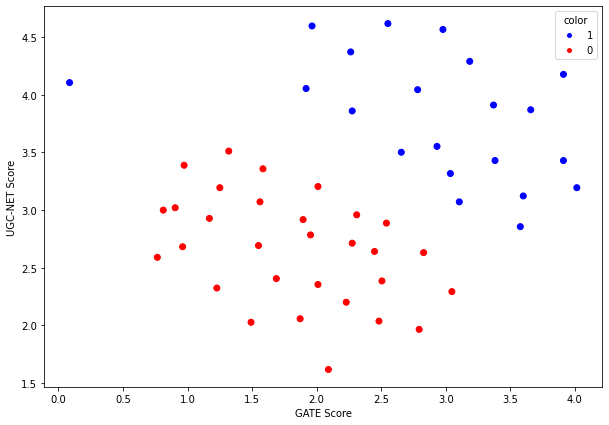

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

figure(figsize = (10,7))

# Load the dataset
data2 = pd.read_csv('/content/SVM_data1.csv', delimiter=',')

X = data2.iloc[:, :-1]  # Features
y = data2.iloc[:, -1]   # Labels

colors = {1:'blue',0:'red'}


#Plot the dataset
plt.scatter(data2['GATE'],data2['UGC'], c = data2['Label'].map(colors))
handles = [Line2D([0], [0], marker='o', color = 'w',markerfacecolor = v, label=k)for k,v in colors.items()]
plt.legend(title = 'color', handles = handles)

plt.xlabel('GATE Score')
plt.ylabel('UGC-NET Score')
#plt.legend()
plt.show()

Question 2

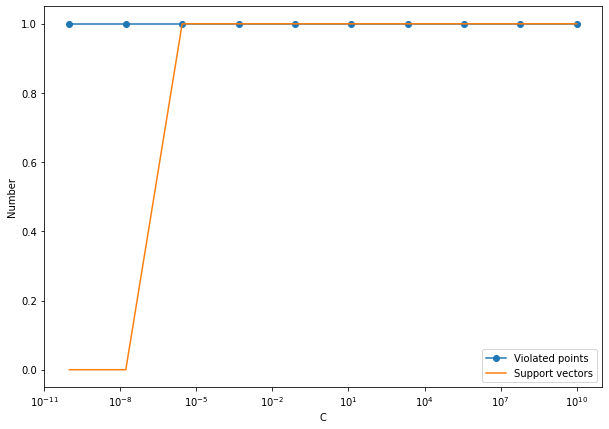

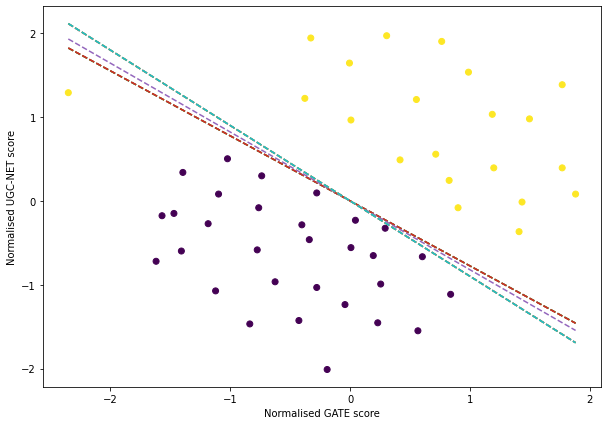

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.svm import SVC
figure(figsize = (10,7))


class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = None
        self.b = None

    def hinge_loss(self, X, Y):
        # calculate hinge loss
        loss = 1 - (Y * (np.dot(X, self.W) + self.b))
        loss[loss < 0] = 0
        return loss

    def fit(self, X, Y, learning_rate=0.01, n_iterations=1000):
        n_samples, n_features = X.shape

        # initialize parameters
        self.W = np.zeros(n_features)
        self.b = 0.0

        # gradient descent
        for i in range(n_iterations):
            loss = self.hinge_loss(X, Y)
            cost = self.C * np.sum(loss) + 0.5 * np.dot(self.W, self.W)

            # calculate gradients
            dW = np.zeros(n_features)
            for j in range(n_samples):
                if loss[j] > 0:
                    dW += self.C * Y.iloc[j] * X.iloc[j]
            dW -= self.W

            db = -self.C * np.sum(Y[loss > 0])

            # update parameters
            self.W -= learning_rate * dW
            self.b -= learning_rate * db

    def predict(self, X):
        # predict class label for input data
        return -np.sign(np.dot(X, self.W) + self.b)

    def n_support_(self, X, Y):
        # count number of support vectors
        support_vectors = np.abs(self.hinge_loss(X, Y)) < 1e-5
        #print(support_vectors)
        return np.sum(support_vectors)


data2 = pd.read_csv('/content/SVM_data1.csv', delimiter=',')
data2['GATE'] = (data2['GATE'] - data2['GATE'].mean())/data2['GATE'].std()
data2['UGC'] = (data2['UGC'] - data2['UGC'].mean())/data2['UGC'].std()


X = data2.iloc[:, :-1]  # Features
y = data2.iloc[:, -1]  
y = y.replace(0,-1)
# print(X)
# print(y)
# Define the range of C values to explore
C_range = np.logspace(-10, 10, num=10)

# Initialize lists to store the results
n_violated_points = []
n_support_vectors = []
decision_boundaries = []

# Loop over the range of C values
for C in C_range:
    # Fit the SVM classifier with the given C value
    svm = SVM(C=C)
    svm.fit(X, y)
    
    # Count the number of violated points and support vectors
    
    n_violated_points.append(np.sum(svm.predict(X) != y))
    num_sv = svm.n_support_(X,y)
    #print(num_sv)
    n_support_vectors.append(num_sv)
    
    # Store the decision boundary for later visualization
    w = svm.W
    b = svm.b
    #print(svm.C)
    #print(w.shape)
    #print(b.shape)
    xx = np.linspace(np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]), num=100)
    yy = (-(w[0]*xx + b)) / w[1]
    decision_boundaries.append((xx, yy))
    
# Plot the number of violated points and support vectors against different C values
#print(n_violated_points)
plt.semilogx(C_range, n_violated_points, marker = 'o', label='Violated points')
plt.semilogx(C_range, n_support_vectors, label='Support vectors')
plt.xlabel('C')
plt.ylabel('Number')
plt.legend()
plt.show()

figure(figsize = (10,7))

# Plot the optimal decision boundary
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.xlabel('Normalised GATE score')
plt.ylabel('Normalised UGC-NET score')
#plt.ylim(0,10)
for xx, yy in decision_boundaries:
    plt.plot(xx, yy, '--')
plt.show()


Question 3

In [ ]:
pip install --upgrade mlxtend


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Accuracy of polynomial kernel SVM: 71.43%
Accuracy of RBF kernel SVM: 86.49%


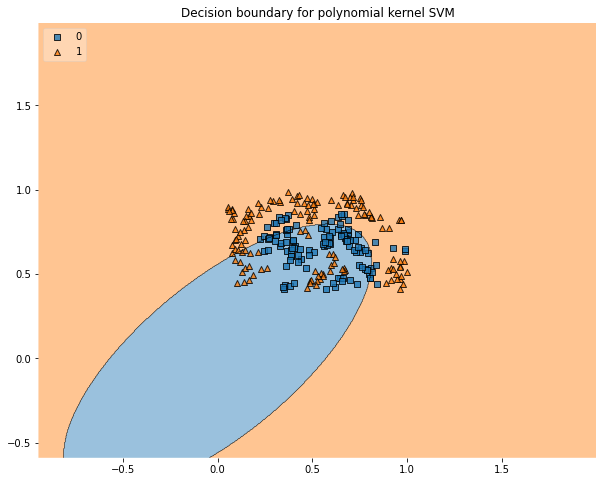

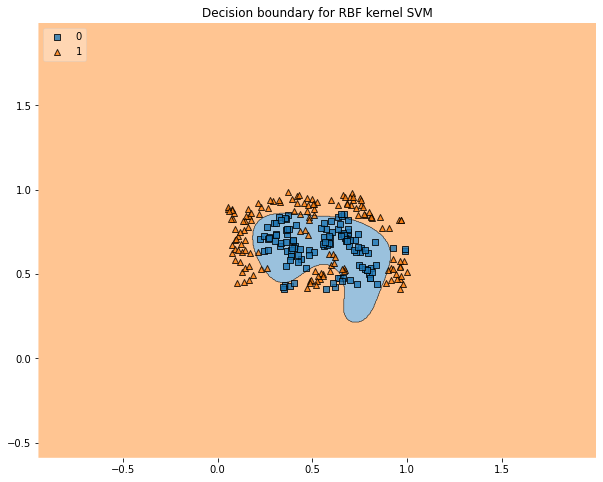

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Load the dataset from file
data = pd.read_csv('/content/PRINCY MALHOTRA - SVM_data2.csv - PRINCY MALHOTRA - SVM_data2.csv.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

fig = plt.figure(figsize=(10, 8))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Fit a non-linear SVM using polynomial kernel (degree=2)
poly_svm = SVC(kernel='poly', degree=2, random_state=0)
poly_svm.fit(X_train, y_train)

# Predict the labels of the test set using the polynomial kernel SVM
y_pred_poly = poly_svm.predict(X_test)
y_pred_poly_train = poly_svm.predict(X_train)

# Calculate the accuracy of the polynomial kernel SVM
accuracy_poly_test = accuracy_score(y_test, y_pred_poly)
accuracy_poly_train = accuracy_score(y_train, y_pred_poly_train)
print("Train Accuracy of polynomial kernel SVM: {:.2f}%".format(accuracy_poly_te * 100))
print("Test Accuracy of polynomial kernel SVM: {:.2f}%".format(accuracy_poly_test * 100))

# Fit a non-linear SVM using RBF kernel
rbf_svm = SVC(kernel='rbf', random_state=0)
rbf_svm.fit(X_train, y_train)

# Predict the labels of the test set using the RBF kernel SVM
y_pred_rbf = rbf_svm.predict(X_test)

# Calculate the accuracy of the RBF kernel SVM
accuracy_rbf_test = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of RBF kernel SVM: {:.2f}%".format(accuracy_rbf_test * 100))

# Plot the decision boundary for polynomial kernel SVM
plot_decision_regions(X_test, y_test, clf=poly_svm, legend=2)
plt.title("Decision boundary for polynomial kernel SVM")
plt.xlim([np.min(X_test[:, 0]) - 1, np.max(X_test[:, 0]) + 1])
plt.ylim([np.min(X_test[:, 1]) - 1, np.max(X_test[:, 1]) + 1])
plt.show()

fig = plt.figure(figsize=(10, 8))

# Plot the decision boundary for RBF kernel SVM
plot_decision_regions(X_test, y_test, clf=rbf_svm, legend=2)
plt.title("Decision boundary for RBF kernel SVM")
plt.xlim([np.min(X_test[:, 0]) - 1, np.max(X_test[:, 0]) + 1])
plt.ylim([np.min(X_test[:, 1]) - 1, np.max(X_test[:, 1]) + 1])
plt.show()




**TASK 4**: PCA and Decision Tree                       **(24 Marks)**

Now lets change the dataset and load dataset given below. 

The dataset we used in the previous section had just two numeric attributes. In this section we will look at a slightly sophisticated dataset having a mix of numeric and categorical attributes describing an adult. The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/adult. The task is to predict whether the person defined by the given set of attributes earns more than 50000 or less (Binary classification task). Implement the following and state your results with respect to this dataset.

1. Implement the decision tree algorithm to classify whether the income of a particular user exceeds \$50K per year or not. Divide the data into two sets: Training set  ($80\%$) and validation set ($20\%$). Plot the training error and validation error against the number of nodes present in the decision tree. (3 + 1 + 3 Marks)

2. Create 10 datasets using feature bagging and instance bagging technique and rerun the part 1 to find the optimal decision tree for each of these datasets. Report the final error by taking the average of each decision tree and report your findings. Did the performance improved? (You can fix number of nodes as best value obtained in previous part). (3 + 3 + 3 Marks)

3. Implement PCA to find optimal number of features. Report the error decision tree found for these optimal features against when we had all features into account.  (5+3 Marks)

Write your code by creating cells below.


In [ ]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

In [ ]:
#write your code here You can create more cells

In [ ]:
#Thanks 

TASK 4

---



Question 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, header=None)

# Define column names
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Set column names
df.columns = columns

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ["workclass", "education", "marital-status", "occupation",
                    "relationship", "race", "sex", "native-country", "income"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split the data into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)



Train Error =  [0.24189957002457008, 0.17337223587223582, 0.15740171990171992, 0.15709459459459463, 0.15444563882063878, 0.14492475429975427, 0.14139281326781328, 0.13935810810810811, 0.1367859336609336, 0.13221744471744468, 0.12388667076167081, 0.11762899262899262, 0.11021959459459463, 0.10350122850122845, 0.0953624078624079, 0.08691646191646196, 0.07966062653562656, 0.07186732186732192, 0.06372850122850127, 0.05651105651105648]
Test Error =  [0.23645017656993705, 0.16536158452326122, 0.15092891140795328, 0.15092891140795328, 0.14709043451558423, 0.1435590357746046, 0.14202364501765696, 0.14217718409335178, 0.1423307231690465, 0.14217718409335178, 0.1444802702287732, 0.14831874712114235, 0.14755105174266847, 0.14755105174266847, 0.15415323199754338, 0.15707047443574385, 0.1596806387225549, 0.16106249040380782, 0.16582220175034545, 0.16536158452326122]


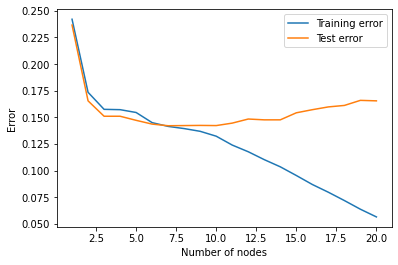

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
         'hours-per-week', 'native-country', 'income']
data = pd.read_csv(data_url, header=None, names=names, na_values=['?'])

# Split data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical features to numerical
X2 = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

# Train decision tree with varying number of nodes
train_error = []
test_error = []
for n in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train, y_train)
    train_error.append(1 - clf.score(X_train, y_train))
    test_error.append(1 - clf.score(X_test, y_test))

print('Train Error = ',train_error)
print('Test Error = ', test_error)
# Plot training and test error against number of nodes
plt.plot(range(1, 21), train_error, label='Training error')
plt.plot(range(1, 21), test_error, label='Test error')
plt.xlabel('Number of nodes')
plt.ylabel('Error')
plt.legend()
plt.show()


Question 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                       'marital-status', 'occupation', 'relationship', 'race', 
                                       'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                                       'native-country', 'income'])

# preprocess the data
data = data.drop('education', axis=1) # education-num is sufficient
data = pd.get_dummies(data) # one-hot encode categorical variables
data = data.replace('<=50K', 0) # replace income values with binary labels
data = data.replace('>50K', 1)

# set the random seed for reproducibility
np.random.seed(42)

# create 10 datasets using feature bagging and instance bagging
num_datasets = 10
num_features = data.shape[1] - 1
num_instances = data.shape[0]
dataset_size = int(0.8 * num_instances)
datasets = []

for i in range(num_datasets):
    # feature bagging
    feature_indices = np.random.choice(num_features, int(np.sqrt(num_features)), replace=False)
    feature_indices = np.concatenate((feature_indices, [num_features]))
    feature_data = data.iloc[:, feature_indices]
    
    # instance bagging
    instance_indices = np.random.choice(num_instances, dataset_size, replace=True)
    instance_data = feature_data.iloc[instance_indices, :]
    
    datasets.append(instance_data)

# train and evaluate decision tree classifiers on each dataset
num_nodes = 9 # best value obtained in previous part
errors = []

for i in range(num_datasets):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(datasets[i].iloc[:, :-1], datasets[i].iloc[:, -1], 
                                                    test_size=0.2, random_state=42)
    
    # train a decision tree classifier
    dt = DecisionTreeClassifier(max_depth=num_nodes)
    dt.fit(X_train, y_train)
    
    # evaluate the performance of the classifier on the testing set
    y_pred = dt.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)
    
# compute the average error across all decision tree classifiers
average_error = np.mean(errors)

print(f"Average error across 10 decision tree classifiers: {average_error}")


Average error across 10 decision tree classifiers: 0.19921305182341653


Question 3

Using in-built library

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Add column names
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Convert income to binary values
df['income'] = df['income'].apply(lambda x: 0 if x == ' <=50K' else 1)

# Convert categorical variables to numerical values
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df = pd.concat([df, cat_list], axis=1)
    df.drop(var, axis=1, inplace=True)

# Handle missing values
df = df.replace(' ?', pd.NA).dropna()

# Split into X and y
X = df.drop('income', axis=1)
y = df['income']


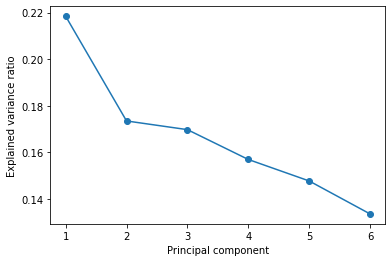

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['float', 'int']))
X_scaled = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=['float', 'int']).columns)

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance for each principal component
import matplotlib.pyplot as plt

plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()


In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train a decision tree classifier on the projected data
clf = DecisionTreeClassifier(random_state=42)


Implementing PCA from scratch

Validation error with PCA: 0.1674
Validation error without PCA: 0.1414


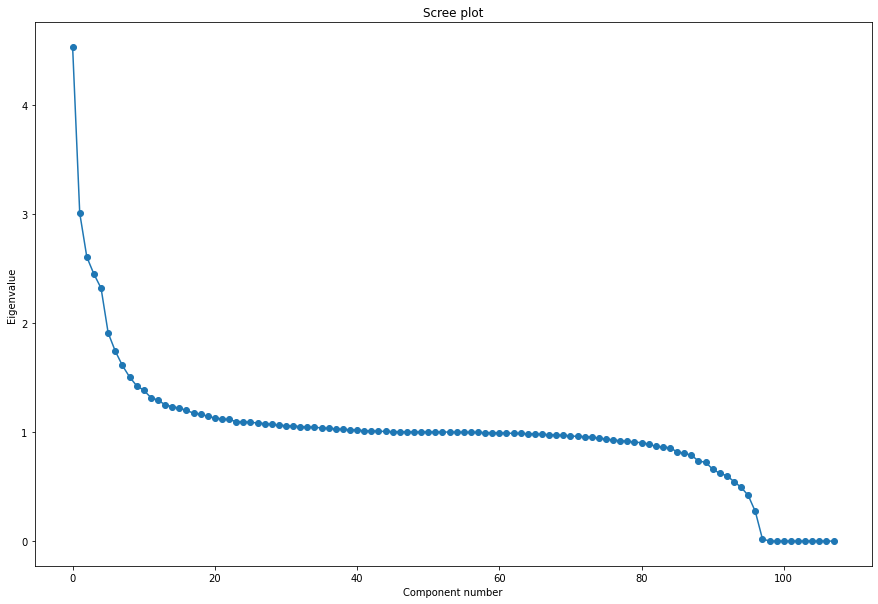

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Load data

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Preprocessing
df = df.replace('?', np.nan)  # Replace missing values with NaN
df = df.dropna()  # Remove samples with missing values
# df = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical features
X = df.drop('income', axis=1).values  # Input features
y = df['income'].values  # Target variable
feature_names = df.drop('income', axis=1).columns.tolist()  # Feature names

# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.nan_to_num(X, nan=1e-10, posinf=1e-10, neginf=-1e-10)


# Compute the covariance matrix
cov_mat = np.cov(X.T)

# Compute eigenvectors and eigenvalues of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# sort the eigenvalues in descending order
sorted_indices = np.argsort(eigen_vals)[::-1]
sorted_eigenvalues = eigen_vals[sorted_indices]

# plot the scree plot
plt.figure(figsize=(15, 10))
plt.plot(sorted_eigenvalues, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')

# Sort eigenvalues in descending order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Choose the top k eigenvectors
k = 10
top_k_eigenvectors = np.array([eigen_pairs[i][1] for i in range(k)])

# Transform the original dataset X via the eigenvectors to obtain a k-dimensional feature subspace X'
X_pca = X.dot(top_k_eigenvectors.T)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the decision tree on X' and evaluate its performance
clf_pca = DecisionTreeClassifier(max_depth=7, random_state=42)
clf_pca.fit(X_train, y_train)
pca_val_error = 1 - clf_pca.score(X_val, y_val)

# Train the decision tree on all features and evaluate its performance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
clf_all = DecisionTreeClassifier(max_depth=7, random_state=42)
clf_all.fit(X_train, y_train)
all_val_error = 1 - clf_all.score(X_val, y_val)

print("Validation error with PCA: {:.4f}".format(pca_val_error))
print("Validation error without PCA: {:.4f}".format(all_val_error))

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.